In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import numpy as np
from collections import OrderedDict
from math import sin
from math import cos
from math import radians
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from functools import partial
from multiprocessing import Pool

In [2]:
path = './dataset.csv'
df = pd.read_csv(path)
df.describe(include='all')

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
count,2.215024e+06,2215024,2215024,2215024,2215024,2215024,2215023,2215024,2215024,2.215024e+06,2.215024e+06,2215024,2.215024e+06
unique,NaN,39,915,7,5613,1439,10,17,25147,NaN,NaN,61430,NaN
top,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/01/2011,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,POINT (-122.403404791479 37.775420706711),NaN
freq,NaN,480448,178836,337941,650,57232,399785,1389500,65267,NaN,NaN,55669,NaN
mean,1.040728e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.224229e+02,3.777076e+01,NaN,1.040728e+13
std,4.612827e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.983459e-02,4.203596e-01,NaN,4.612827e+12
min,3.979000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.225136e+02,3.770788e+01,NaN,3.979630e+08
25%,6.124170e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.224332e+02,3.775302e+01,NaN,6.124170e+12
50%,1.011558e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.224166e+02,3.777542e+01,NaN,1.011558e+13
75%,1.409256e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.224069e+02,3.778448e+01,NaN,1.409256e+13


In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4d6602350>,
      dtype=object)

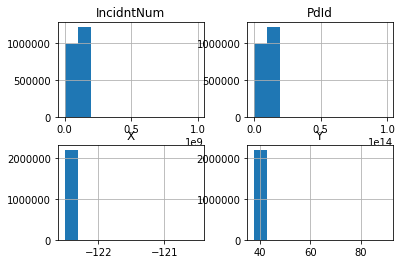

In [4]:
df.hist()

# Utility Functions

Below are utilty functions that we'll be using throughout the analysis. 

In [31]:
def incidents_per_feature(df, feature, reverse_sort=False):
  '''Returns each possible feature's value mapped to the # of incidents 
  '''
  incidents_per_feature = df.groupby(by=feature).size()
  incidents_per_feature.items()
  return OrderedDict(sorted(
      incidents_per_feature.items(),
      key=lambda key_value_pair: key_value_pair[1],
      reverse=reverse_sort
  ))


def plot_by_feature(df, feature, figsize=(12, 8)):
  '''Plots a bar graph of the # of instances vs the feature's possible values
  '''
  incidents = incidents_per_feature(df, feature)

  plt.figure(figsize=figsize)
  plt.bar(
      x=range(len(incidents)),
      height=incidents.values(),
      tick_label=list(incidents.keys())
  )
  plt.xticks(rotation='vertical')
  plt.title('Number of Incidents vs {}'.format(feature))
  plt.show()

def plot_by_features(df, features, figsize=(12, 8), nrows=1, ncols=1):
  '''Just like plot_by_feature, but allows creating subplots to show each feature
  side by side.
  '''
  plt.figure(figsize=figsize)
  index = 1

  for feature in features:
    incidents = incidents_per_feature(df, feature)
    
    plt.subplot(nrows, ncols, index)
    plt.bar(
        x=range(len(incidents)),
        height=incidents.values(),
        tick_label=list(incidents.keys())
    )
    plt.xticks(rotation='vertical')
    plt.title('Number of Incidents vs {}'.format(feature))

    index += 1

  plt.show()


Out of curiousity, we can plot the number of incidents by PdDistrict and Category

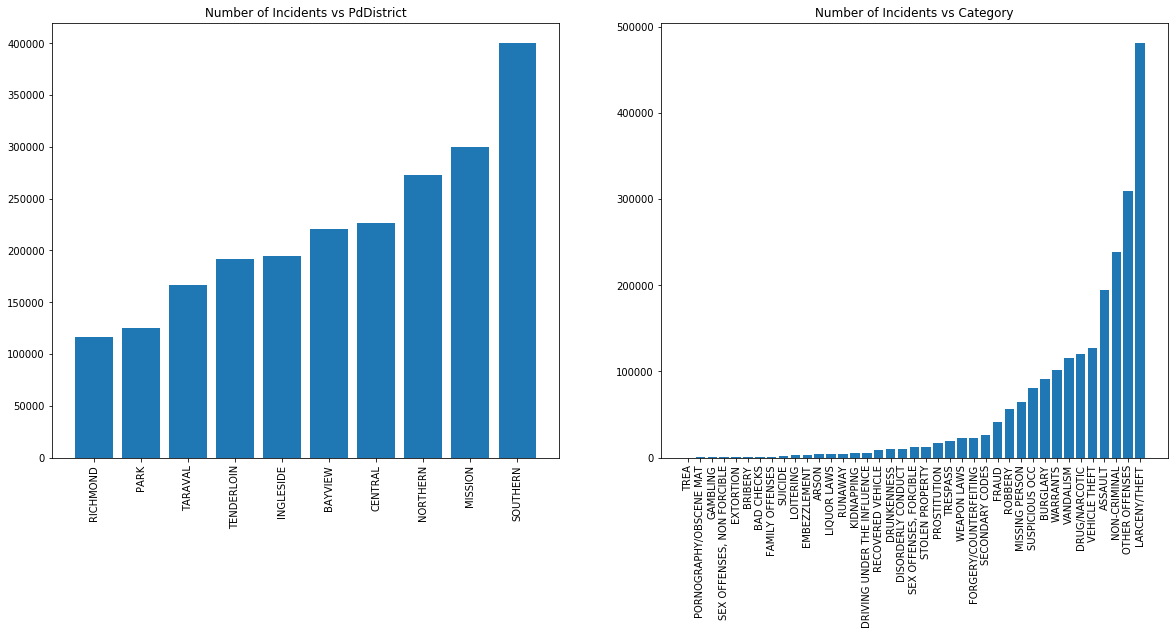

In [6]:
features_to_plot = [
  'PdDistrict',
  'Category'
]

plot_by_features(
    df=df,
    features=features_to_plot,
    nrows=1,
    ncols=2,
    figsize=(20,8)
)

We can see that out of all the districts, the `SOUTHERN` district has the highest number of reported incidents (~400,000). The next district is `MISSION` which has a little less than 300,000 incidents reported.

In addition, we can see that the top three incident categories are: `NON-CRIMINAL`, `OTHER OFFENSES`, and `LARCENCY/THEFT`; where `LARCENCY/THEFT` is the top.

# Labeling incidents as violent and non-violent crimes

These are the different incident categories with their counts. We will classify some categories as non-violent, and others as violent for the purposes of training our model

In [7]:
incidents_per_category = incidents_per_feature(
    df=df,
    feature='Category',
    reverse_sort=True
)

for k, v in incidents_per_category.items():
  print('{category}: {count}'.format(
      category=k,
      count=v
  ))

LARCENY/THEFT: 480448
OTHER OFFENSES: 309358
NON-CRIMINAL: 238323
ASSAULT: 194694
VEHICLE THEFT: 126602
DRUG/NARCOTIC: 119628
VANDALISM: 116059
WARRANTS: 101379
BURGLARY: 91543
SUSPICIOUS OCC: 80444
MISSING PERSON: 64961
ROBBERY: 55867
FRAUD: 41542
SECONDARY CODES: 25831
FORGERY/COUNTERFEITING: 23050
WEAPON LAWS: 22234
TRESPASS: 19449
PROSTITUTION: 16701
STOLEN PROPERTY: 11891
SEX OFFENSES, FORCIBLE: 11742
DISORDERLY CONDUCT: 10040
DRUNKENNESS: 9826
RECOVERED VEHICLE: 8716
DRIVING UNDER THE INFLUENCE: 5672
KIDNAPPING: 5346
RUNAWAY: 4440
LIQUOR LAWS: 4083
ARSON: 3931
EMBEZZLEMENT: 2988
LOITERING: 2430
SUICIDE: 1292
FAMILY OFFENSES: 1183
BAD CHECKS: 925
BRIBERY: 813
EXTORTION: 741
SEX OFFENSES, NON FORCIBLE: 431
GAMBLING: 348
PORNOGRAPHY/OBSCENE MAT: 59
TREA: 14


Next, we can take a look at the number of incidents per unique description.

In [8]:
incidents_per_description = incidents_per_feature(
    df=df,
    feature='Descript',
    reverse_sort=True
)

print('Number of unique descriptions: {}'.format(len(incidents_per_description)))

for k, v in incidents_per_description.items():
  print('{category}: {count}'.format(
      category=k,
      count=v
  ))

Number of unique descriptions: 915
GRAND THEFT FROM LOCKED AUTO: 178836
LOST PROPERTY: 77956
BATTERY: 67654
STOLEN AUTOMOBILE: 64763
DRIVERS LICENSE, SUSPENDED OR REVOKED: 62534
AIDED CASE, MENTAL DISTURBED: 56313
WARRANT ARREST: 56230
SUSPICIOUS OCCURRENCE: 52490
PETTY THEFT FROM LOCKED AUTO: 51946
PETTY THEFT OF PROPERTY: 46114
MALICIOUS MISCHIEF, VANDALISM: 45238
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES: 44290
TRAFFIC VIOLATION: 38105
THREATS AGAINST LIFE: 34670
FOUND PROPERTY: 33383
GRAND THEFT OF PROPERTY: 29420
ENROUTE TO OUTSIDE JURISDICTION: 29104
PETTY THEFT FROM A BUILDING: 25728
FOUND PERSON: 24539
PETTY THEFT SHOPLIFTING: 24478
POSSESSION OF NARCOTICS PARAPHERNALIA: 22891
GRAND THEFT FROM A BUILDING: 22503
CREDIT CARD, THEFT BY USE OF: 22079
STOLEN TRUCK: 21492
RESISTING ARREST: 21474
MISSING ADULT: 20574
MISCELLANEOUS INVESTIGATION: 20219
MISSING JUVENILE: 19848
INVESTIGATIVE DETENTION: 19360
DOMESTIC VIOLENCE: 18488
GRAND THEFT FROM PERSON: 18119
PROBATION VIOLATION: 180

From the above printout, we can see there are 915 unique descriptions. Sifting through these descriptions and labelling them as violent or non-violent would be time-consuming. Instead we can save some time and just rely on the categories themselves.

However, an interesting thing to notice is that under the `OTHER OFFENSES` category, some of the descriptions mention of an incident that would be considered violent. For example, `TRAFFIC COLLISION, HIT & RUN, PROPERTY DAMAGE`. If our initial feature selection/engineering does not result in a good model, we could possibly use `Descript` instead of `Category` for better granularity.

In [9]:
incidents_per_description = incidents_per_feature(
    df=df[df.Category == 'OTHER OFFENSES'],
    feature='Descript',
    reverse_sort=True
)

print('Number of unique descriptions for `OTHER OFFENSES` category: {}'.format(len(incidents_per_description)))

for k, v in incidents_per_description.items():
  print('{category}: {count}'.format(
      category=k,
      count=v
  ))

Number of unique descriptions for `OTHER OFFENSES` category: 179
DRIVERS LICENSE, SUSPENDED OR REVOKED: 62534
TRAFFIC VIOLATION: 38105
RESISTING ARREST: 21474
MISCELLANEOUS INVESTIGATION: 20219
PROBATION VIOLATION: 18080
TRAFFIC VIOLATION ARREST: 17172
LOST/STOLEN LICENSE PLATE: 16600
VIOLATION OF RESTRAINING ORDER: 13597
PAROLE VIOLATION: 10560
FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY: 8134
CONSPIRACY: 7682
POSSESSION OF BURGLARY TOOLS: 5892
OBSCENE PHONE CALLS(S): 5731
VIOLATION OF MUNICIPAL CODE: 5489
HARASSING PHONE CALLS: 5049
FALSE PERSONATION: 4750
VIOLATION OF MUNICIPAL POLICE CODE: 4138
MISCELLANEOUS STATE MISDEMEANOR: 3760
FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR PROPERTY: 3269
FALSE EVIDENCE OF VEHICLE REGISTRATION: 2800
PERMIT VIOLATION, POLICE (GENERAL): 1823
TAMPERING WITH A VEHICLE: 1780
OBSTRUCTIONS ON STREETS/SIDEWALKS: 1684
FAILURE TO REGISTER AS SEX OFFENDER: 1653
STAY AWAY ORDER VIOLATION, DV RELATED: 1584
INDECENT EXPOSURE: 1383
PEDDLING WITHOUT A LICENSE

To contrast with the above, we can check the descriptions for incidents categorized as `NON-CRIMINAL`.

In [10]:
incidents_per_description = incidents_per_feature(
    df=df[df.Category == 'NON-CRIMINAL'],
    feature='Descript',
    reverse_sort=True
)

print('Number of unique descriptions for NON-CRIMINAL incident category: {}'.format(len(incidents_per_description)))

for k, v in incidents_per_description.items():
  print('{category}: {count}'.format(
      category=k,
      count=v
  ))

Number of unique descriptions for NON-CRIMINAL incident category: 40
LOST PROPERTY: 77956
AIDED CASE, MENTAL DISTURBED: 56313
FOUND PROPERTY: 33383
AIDED CASE: 14250
DEATH REPORT, CAUSE UNKNOWN: 10735
CASE CLOSURE: 6021
STAY AWAY OR COURT ORDER, NON-DV RELATED: 4311
AIDED CASE, DOG BITE: 3543
CIVIL SIDEWALKS, CITATION: 3040
PROPERTY FOR IDENTIFICATION: 2777
AIDED CASE, INJURED PERSON: 2688
COURTESY REPORT: 2466
DEATH REPORT, NATURAL CAUSES: 2338
AIDED CASE -PROPERTY FOR DESTRUCTION: 2317
CIVIL SIDEWALKS, WARNING: 2317
FIRE REPORT: 2028
SEARCH WARRANT SERVICE: 1933
LOCATED PROPERTY: 1725
TARASOFF REPORT: 1594
TURNED IN GUN: 1284
TRAFFIC ACCIDENT: 1238
LICENSE PLATE, RECOVERED: 945
IMPOUNDED VEHICLE: 792
SHELTER: 770
AIDED CASE, SICK PERSON: 571
LICENSE PLATE, FOUND: 356
MISPLACED VEHICLE: 132
CIVIL SIDEWALKS, BOOKING: 131
CIVIL SIDEWALKS, VIOLATION: 91
TRUANT, HABITUAL: 66
DEATH, ACCIDENTAL: 40
DEATH, NON-MANSLAUGHTER AUTO ACCIDENT: 31
DEMONSTRATION, VIDEO EVIDENCE, MISC. INVESTIGATION:

Quickly going over the discrete descriptions, we see that none of these are violent.

There are a few categories that we need to go through to decided whether they're for violent or non-violent crimes: 

In [11]:
categories_to_check = [
  'SUSPICIOUS OCC',
  'SECONDARY CODES',
  'DISORDERLY CONDUCT'
]

for category in categories_to_check:
  incidents_per_description = incidents_per_feature(
      df=df[df.Category == category],
      feature='Descript',
      reverse_sort=True
  )

  print('Number of unique descriptions for `{category}` incident category: {num_unique}'.format(
      category=category,
      num_unique=len(category)
  ))

  for k, v in incidents_per_description.items():
    print('{category}: {count}'.format(
        category=k,
        count=v
    ))

  print('\n\n')


Number of unique descriptions for `SUSPICIOUS OCC` incident category: 14
SUSPICIOUS OCCURRENCE: 52490
INVESTIGATIVE DETENTION: 19360
SUSPICIOUS PERSON: 4157
SUSPICIOUS ACT TOWARDS FEMALE: 2000
SUSPICIOUS OCCURRENCE, POSSIBLE SHOTS FIRED: 868
SUSPICIOUS ACT TOWARDS CHILD: 673
UNUSUAL OCCURENCE: 478
SUSPICIOUS AUTO, POSSIBLY SEX: 418



Number of unique descriptions for `SECONDARY CODES` incident category: 15
DOMESTIC VIOLENCE: 18488
JUVENILE INVOLVED: 3124
GANG ACTIVITY: 1853
PREJUDICE-BASED INCIDENT: 1633
ATM RELATED CRIME: 633
BATTERY BY JUVENILE SUSPECT: 53
WEAPONS POSSESSION BY JUVENILE SUSPECT: 27
ASSAULT BY JUVENILE SUSPECT: 18
SHOOTING BY JUVENILE SUSPECT: 2



Number of unique descriptions for `DISORDERLY CONDUCT` incident category: 18
COMMITTING PUBLIC NUISANCE: 3254
DISTURBING THE PEACE: 2169
MAINTAINING A PUBLIC NUISANCE AFTER NOTIFICATION: 1755
DISTURBING THE PEACE, FIGHTING: 1170
MAINTAINING A PUBLIC NUISANCE: 902
DISTURBING THE PEACE, COMMOTION: 404
DISTURBING THE PEACE, S

As we can see above:
* `SUSPICIOUS OCC` -> Non-Violent
* `SECONDARY CODES` -> May be violent depending on description
* `DISORDERLY CONDUCT` -> May be violent depending on description

For now, we can classify these three as non-violent. And increase granularity of our labeling in a future iteration, if necessary.

We can now label the different crimes as non-violent and violent crimes

In [12]:
crime_categories = list(df['Category'].unique())

# V1:
#   'LARCENY/THEFT',
#   'ASSAULT',
#   'VEHICLE THEFT',
#   'VANDALISM',
#   'BURGLARY',
#   'ROBBERY',
#   'SEX OFFENSES, FORCIBLE',
#   'DRUNKENNESS',
#   'DRIVING UNDER THE INFLUENCE',
#   'KIDNAPPING',
#   'ARSON',
#   'SEX OFFENSES, NON FORCIBLE'

# V2:
#   'ASSAULT',
#   'ROBBERY',
#   'SEX OFFENSES, FORCIBLE',
#   'DRUNKENNESS',
#   'DRIVING UNDER THE INFLUENCE',
#   'KIDNAPPING',
#   'ARSON',
#   'SEX OFFENSES, NON FORCIBLE'

# V3:
#   'LARCENY/THEFT',
#   'ASSAULT',
#   'BURGLARY',
#   'ROBBERY',
#   'SEX OFFENSES, FORCIBLE',
#   'DRUNKENNESS',
#   'DRIVING UNDER THE INFLUENCE',
#   'KIDNAPPING',
#   'ARSON',
#   'SEX OFFENSES, NON FORCIBLE'

violent_crimes = [
  'LARCENY/THEFT',
  'ASSAULT',
  'VEHICLE THEFT',
  'VANDALISM',
  'BURGLARY',
  'ROBBERY',
  'SEX OFFENSES, FORCIBLE',
  'DRUNKENNESS',
  'DRIVING UNDER THE INFLUENCE',
  'KIDNAPPING',
  'ARSON',
  'SEX OFFENSES, NON FORCIBLE'
]

non_violent_crimes = [crime for crime in crime_categories if crime not in violent_crimes]

# Exploring violent and non-violent crimes

Here, we'll be creating the `is_violent` feature for each row based on its category.

In [13]:
modified_df = df
modified_df['is_violent'] = modified_df.apply(
    func=lambda row: row['Category'] in violent_crimes,
    axis='columns'
)
modified_df.describe(include='all')

Let's graph the number of violent crimes vs non-violent crimes

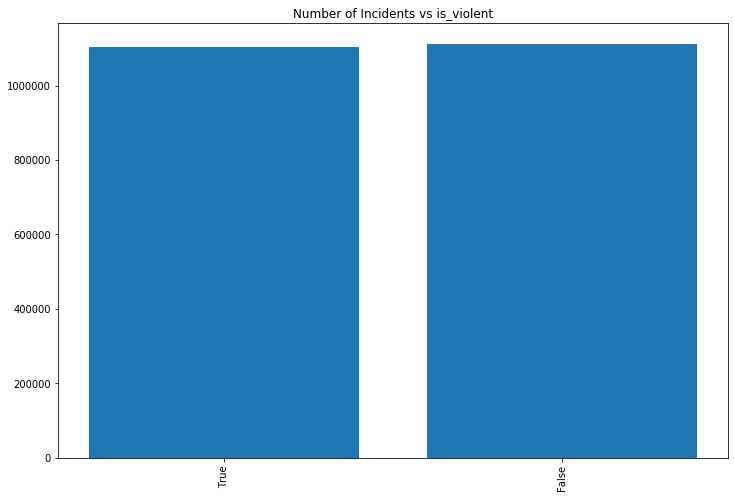

In [15]:
plot_by_feature(
    df=modified_df,
    feature='is_violent'
)

Based on our labelling, there are about an even number of violent and non-violent crimes

Next, we can graph the number of incidents per PdDistrict for violent crimes

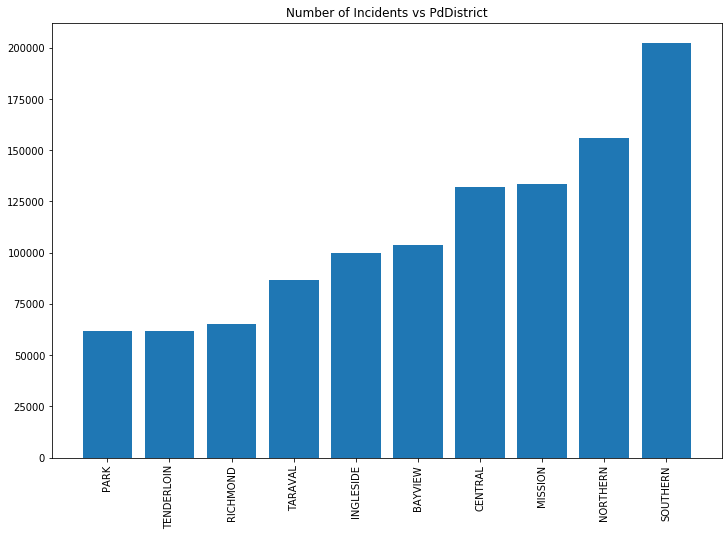

In [16]:
plot_by_feature(
    df=modified_df[modified_df['is_violent'] == True],
    feature='PdDistrict'
)

Similarly, we'll graph the number of incidents per PdDistrict for non-violent crimes

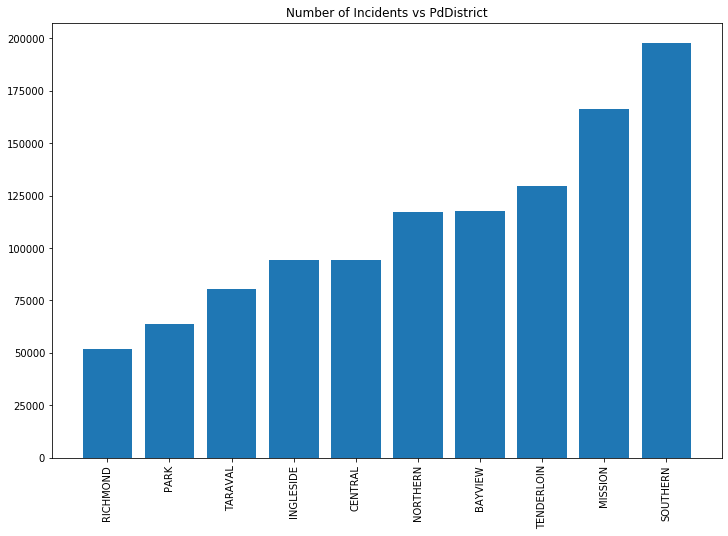

In [17]:
plot_by_feature(
    df=modified_df[modified_df['is_violent'] == False],
    feature='PdDistrict'
)

Looking at the above two graphs, we can see something peculiar. I expected tenderloin to have higher violent crimes than non-violent crimes. This may be the result in how we labelled violent to non-violent crimes; or just the reality in the incident reports.

# Encoding Lat/Long into x,y,z coordinates

Next, we'll need to encode the latitude and longitude features into x, y, z coordinates. This is due to how they represent 3D space. Two extreme values for latitude or longitude can be in fact next to each other. Due to this, we will need to encode them in cartesian space.

Suggestion came from [here](https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature)

In [18]:
def get_cartesian(latitude, longitude, coordinate=None):
  latitude = radians(latitude)
  longitude = radians(longitude)

  if coordinate == 'x':
    return cos(latitude) * cos(longitude)
  
  elif coordinate == 'y':
    return cos(latitude) * sin(longitude)
  
  elif coordinate == 'z':
    return sin(latitude)
  
  elif coordinate is None:
    x = cos(latitude) * cos(longitude)
    y = cos(latitude) * sin(longitude)
    z = sin(latitude)

    return (x, y, z)

We'll want to parallelize our `pd.apply` calls since our dataset is fairly large, as well as to take advantage of the hardware this notebook is being ran on. Not parallelizing these operations would take a fair amount of time. For reference, this notebook is being ran on an AWS EC2 C5.xlarge instance. This gives us 4 vCPUs and 8 GB of RAM. 

Parallelizing code from [here](http://www.racketracer.com/2016/07/06/pandas-in-parallel/)

In [19]:
modified_cartesian_df = modified_df

def parallelize(df, func, num_partitions=4, **kwargs):
  '''Parallelizes a function to apply on pandas dataframe
  '''
  num_cores = 4
  df_split = np.array_split(df, num_partitions)
  pool = Pool(num_cores)
  func = partial(func, **kwargs)
  df = pd.concat(pool.map(func, df_split))
  pool.close()
  pool.join()
  return df

def compute_cartesian(data, coordinate, column):
  '''Computes the cartesian coordinates
  '''
  print('Computing {} coordinate'.format(coordinate))
  data[column] = data.apply(
    func=lambda row: get_cartesian(
      latitude=row['Y'],
      longitude=row['X'],
      coordinate=coordinate
    ),
    axis='columns'
  )
  return data

to_calculate = {
  'x': 'x_cartesian',
  'y': 'y_cartesian',
  'z': 'z_cartesian'
}

for k,v in to_calculate.items():
  modified_cartesian_df = parallelize(
    modified_cartesian_df,
    compute_cartesian,
    coordinate=k,
    column=v
  )

Computing x coordinate
Computing x coordinate
Computing x coordinate
Computing x coordinate
Computing y coordinate
Computing y coordinate
Computing y coordinate
Computing y coordinate
Computing z coordinate
Computing z coordinate
Computing z coordinate
Computing z coordinate


For a sanity check, let's check the first few rows

In [20]:
modified_cartesian_df.head(4)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,is_violent,x_cartesian,y_cartesian,z_cartesian
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,False,-0.424736,-0.667309,0.611799
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010,False,-0.423626,-0.667235,0.612649
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200,False,-0.424010,-0.667227,0.612392
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016,False,-0.423842,-0.667305,0.612423


Below, we'll graph the points on a 3D graph. It would be nice to see how the points look like. We'll be graphing a 
small subset of the data due to the sheer amount of rows.

We use two colors to denote whether a specific location has a violent crime or not. Red denotes non-violent, while blue denotes violent.

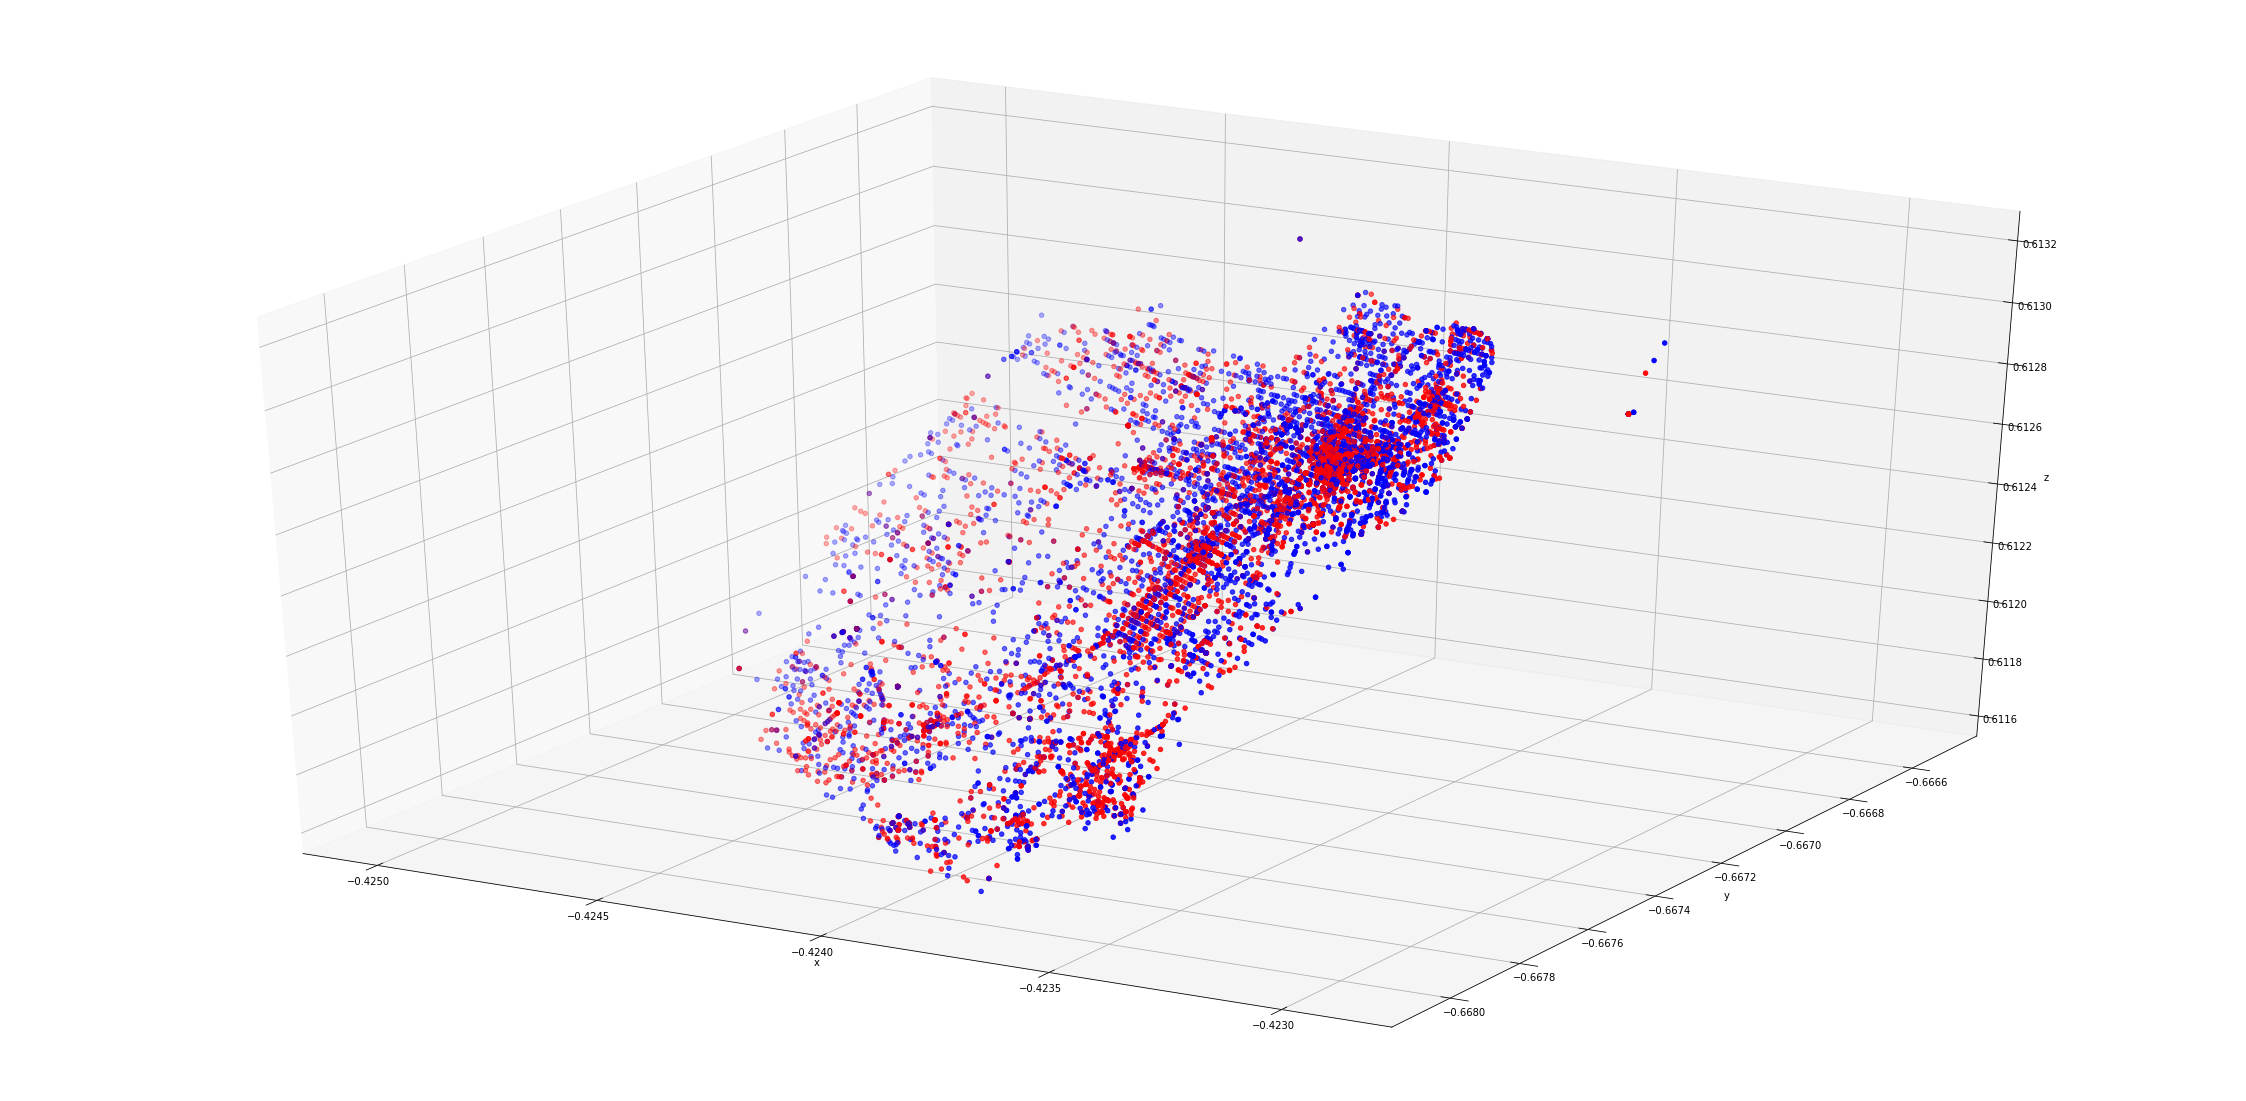

In [21]:
from matplotlib.colors import ListedColormap

num_to_plot = 10000

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig = plt.figure(figsize=(40, 20))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(
  xs=modified_cartesian_df.head(num_to_plot)['x_cartesian'].values,
  ys=modified_cartesian_df.head(num_to_plot)['y_cartesian'].values,
  zs=modified_cartesian_df.head(num_to_plot)['z_cartesian'].values,
  c=modified_cartesian_df.head(num_to_plot)['is_violent'].values,
  cmap=cm_bright
)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.show()

# Final Feature Engineering & Selection

Finally, we'll want to do some final feature engineering and select the features we want to train our models with. The features we'll be creating will be:
- `Time` as two cyclical features
- `year`

In [22]:
final_df = modified_cartesian_df
final_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,is_violent,x_cartesian,y_cartesian,z_cartesian
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,False,-0.424736,-0.667309,0.611799
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010,False,-0.423626,-0.667235,0.612649
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200,False,-0.424010,-0.667227,0.612392
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016,False,-0.423842,-0.667305,0.612423
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200,False,-0.423825,-0.667483,0.612241


### Time
We want the cyclical nature of time to be a factor when training our models. So we'll need to convert it into two cyclical features: `sin_time`, `cos_time`

First, we'll need to convert the time feature into seconds

Encoding time into a cyclical feature, sourced from [here](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/)

In [23]:
def time_to_sec(row):
  time = pd.to_datetime(row['Time']).time()
  return (time.hour * 60 + time.minute) * 60 + time.second

def compute_sec(data):
  print('converting time to sec')
  data['Time'] = data.apply(
    func=time_to_sec,
    axis='columns'
  )
  return data
  
final_df = parallelize(
  final_df,
  compute_sec,
)

converting time to sec
converting time to sec
converting time to sec
converting time to sec


For a sanity check, we can see the first few rows

In [24]:
final_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,is_violent,x_cartesian,y_cartesian,z_cartesian
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,57600,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,False,-0.424736,-0.667309,0.611799
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,44880,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010,False,-0.423626,-0.667235,0.612649
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,7200,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200,False,-0.424010,-0.667227,0.612392
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,72780,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016,False,-0.423842,-0.667305,0.612423
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,65400,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200,False,-0.423825,-0.667483,0.612241


We'll take the Time feature that is now encoded in seconds and use that to calculate the `sin_time` and `cos_time` features

In [25]:
seconds_in_day = 24*60*60

final_df['sin_time'] = np.sin((2 * np.pi * final_df['Time']) / seconds_in_day)
final_df['cos_time'] = np.cos((2 * np.pi * final_df['Time']) / seconds_in_day)

final_df.head()

### Year

Lastly, we'll want the year of the incident. The year that an incident occurs may play a role in where violent crimes occur. Crime in cities are always changing, so we should take that into consideration

In [33]:
def compute_year(data):
  data['year'] = data.apply(
    func=lambda row: pd.to_datetime(row['Date']).year,
    axis='columns'
  )
  return data
  
final_df = parallelize(
  final_df,
  compute_year,
  12
)

Process ForkPoolWorker-21:
Process ForkPoolWorker-22:
Traceback (most recent call last):
Process ForkPoolWorker-23:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-24:
  File "/home/ubuntu/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/home/ubuntu/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/home/ubuntu/anac

KeyboardInterrupt: 

  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/internals/managers.py", line 1586, in internal_values
    return self._block.internal_values()
  File "/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/internals/blocks.py", line 207, in internal_values
    def internal_values(self, dtype=None):
KeyboardInterrupt


### Feature Selection & Data Export
Lastly, we'll select which features we want to train our models with later and export them into a csv.

In [34]:
final_df.columns.to_list()

['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId',
 'is_violent',
 'x_cartesian',
 'y_cartesian',
 'z_cartesian',
 'sin_time',
 'cos_time',
 'year']

In [35]:
output_df = final_df[[
  'year',
  'DayOfWeek',
  'x_cartesian',
  'y_cartesian',
  'z_cartesian',
  'sin_time',
  'cos_time',
  'is_violent'
]]

output_df

,year,DayOfWeek,x_cartesian,y_cartesian,z_cartesian,sin_time,cos_time,is_violent
0,2011,Friday,-0.424736,-0.667309,0.611799,-0.866025,-0.500000,False
1,2009,Thursday,-0.423626,-0.667235,0.612649,-0.121869,-0.992546,False
2,2013,Friday,-0.424010,-0.667227,0.612392,0.500000,0.866025,False
3,2008,Tuesday,-0.423842,-0.667305,0.612423,-0.836286,0.548293,False
4,2007,Saturday,-0.423825,-0.667483,0.612241,-0.999048,0.043619,False
...,...,...,...,...,...,...,...,...
2215019,2006,Monday,-0.423582,-0.667314,0.612593,-0.923880,0.382683,False
2215020,2013,Tuesday,-0.423885,-0.667429,0.612258,-0.130526,0.991445,True
2215021,2003,Wednesday,-0.423824,-0.667782,0.611915,-0.342020,-0.939693,False
2215022,2004,Friday,-0.423437,-0.667172,0.612848,-0.866025,-0.500000,True


In [ ]:
output_path = 'engineered_dataset.csv'
output_df.to_csv(output_path, index=False)